# Import necessary libraries

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the MNIST dataset

In [3]:
%pip install pandas

     ---------------------------------------- 11.6/11.6 MB 2.4 MB/s eta 0:00:00
     ------------------------------------ 508.0/508.0 kB 937.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)

Loading MNIST dataset...


c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:75: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)
c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:110: UserWarning: A network error occurred while downloading https://api.openml.org/data/v1/download/52667. Retrying...
  warn(


# Step 2: Convert labels to integers

In [5]:
print("Converting labels to integers...")
labels = mnist.target.astype(np.uint8)

Converting labels to integers...


# Step 3: Separate data and labels

In [6]:
data = mnist.data

# Convert data to a NumPy array if it's a DataFrame

In [8]:
if hasattr(data, 'values'):
    data = data.values

# Step 4: Visualize the data to ensure it's loaded correctly

Visualizing the first image...


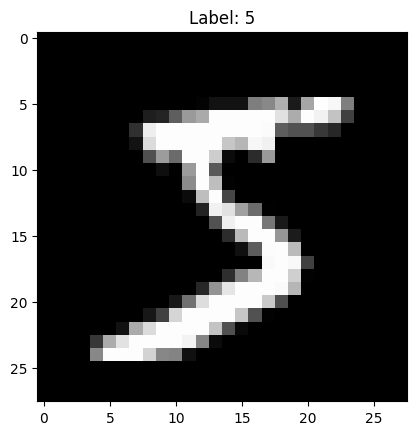

In [9]:
print("Visualizing the first image...")
plt.imshow(data[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()

# Step 5: Display the dimensionality of the data

In [10]:
print(f"Shape of data: {data.shape}")
print(f"Shape of labels: {labels.shape}")

Shape of data: (70000, 784)
Shape of labels: (70000,)


# Step 6: Redraw an image and display its label

Visualizing image at index 42...


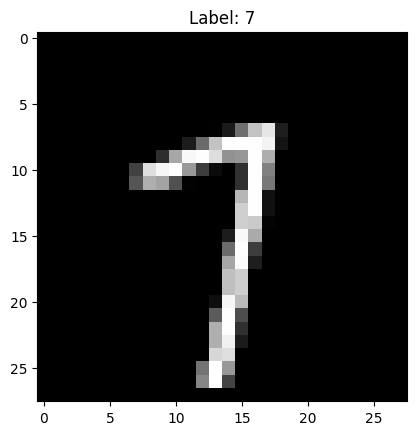

In [11]:
index = 42  # You can change this index to display a different image
print(f"Visualizing image at index {index}...")
plt.imshow(data[index].reshape(28, 28), cmap='gray')
plt.title(f"Label: {labels[index]}")
plt.show()

# Step 7: Create an automatic handwritten digit recognition system

In [12]:
print("Creating and training the model...")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a neural network model
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10, random_state=42)
model.fit(X_train, y_train)

Creating and training the model...


c:\Users\j\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10, random_state=42)

## Make predictions on the test set

In [13]:
y_pred = model.predict(X_test)

# Evaluate the model's accuracy

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 96.94%


Predicted Label: 3


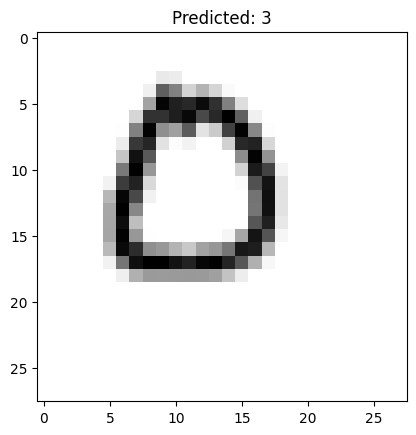

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_custom_image(image_path):
    # Open the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    # Resize to 28x28 pixels
    image = image.resize((28, 28))
    # Convert to numpy array and normalize
    image_array = np.array(image) / 255.0
    # Invert colors (MNIST uses white digits on black background)
    # image_array = 1 - image_array
    # Flatten the image to match MNIST format
    image_array = image_array.reshape(1, -1)
    return image_array

# Path to your custom image
custom_image_path = r'\Users\j\Desktop\mll.png'  

# Preprocess the image
custom_image = preprocess_custom_image(custom_image_path)

# Predict the digit
prediction = model.predict(custom_image)
print(f"Predicted Label: {prediction[0]}")

# Display the custom image
plt.imshow(custom_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {prediction[0]}")
plt.show()

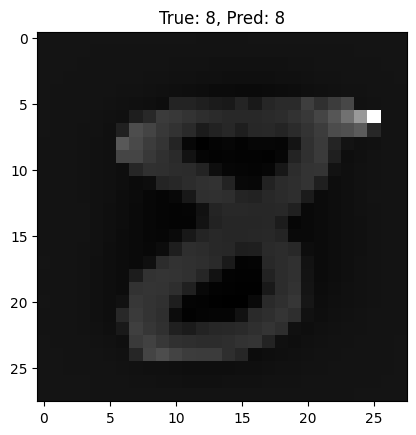

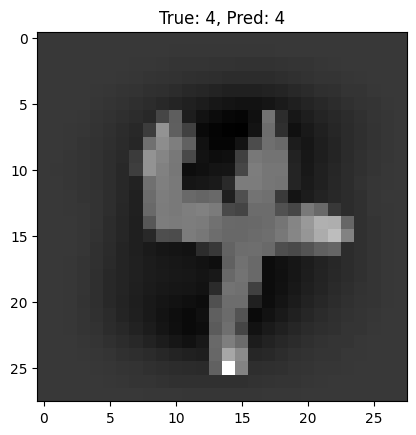

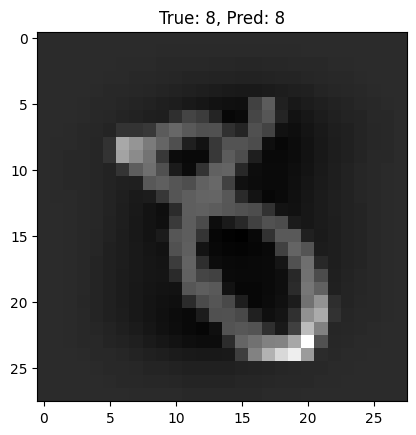

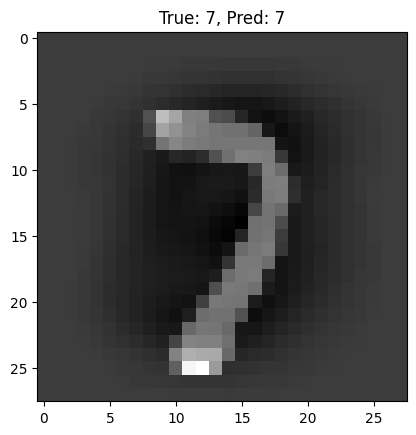

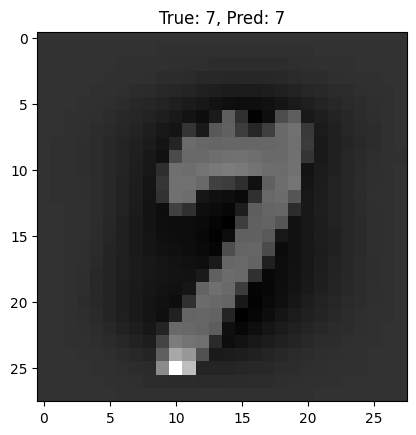

In [23]:
X_test = X_test.values if hasattr(X_test, 'values') else X_test
y_test = y_test.values if hasattr(y_test, 'values') else y_test

# Visualize the first 5 test images with their true and predicted labels
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {model.predict([X_test[i]])[0]}")
    plt.show()